# Chapter 8 : Vapour Power Systems

## Example 8.1:Analyzing an Ideal Rankine Cycle Page 438

Steam is the working fluid in an ideal Rankine cycle. 

Saturated vapor enters the turbine at 8.0 MPa and saturated liquid exits the condenser at a pressure of 0.008 MPa. 

The net power output of the cycle is 100 MW.

<img src="./img/vps-fig81.png"/> 

Determine for the cycle

(a) the thermal efficiency,

(b) the back work ratio, 

(c) the mass flow rate of the steam,in kg/h,

(d) the rate of heat transfer, Qin, into the working fluid as it passes through the boiler, in MW,

(e) the rate of heat transfer, Qout, from the condensing steam as it passes through the condenser, in MW,

(f) the mass flow rate of the condenser cooling water, in kg/h, if cooling water enters the condenser at 15C and exits at 35C.

### SOLUTION

#### Known:

An ideal Rankine cycle operates with steam as the working fluid. The boiler and condenser pressures
are specified, and the net power output is given.

##### Find: 

Determine the thermal efficiency, the back work ratio, the mass flow rate of the steam, in kg/h, the rate
of heat transfer to the working fluid as it passes through the boiler, in MW, the rate of heat transfer from the
condensing steam as it passes through the condenser, in MW, the mass flow rate of the condenser cooling water,
which enters at 158C and exits at 358C.

In [4]:
from seuif97 import *

# Given:-
p1 = 8.0               # pressure of saturated vapor entering the turbine in MPa
p3 = 0.008             # pressure of saturated liquid exiting the condenser in MPa
Wcycledot = 100.00     # the net power output of the cycle in MW

# Analysis

# State  1
h1=px2h(p1,1)          # h1 = 2758.0    From table A-3  kj/kg
s1=px2s(p1,1)          # s1 = 5.7432    From table A-3  kj/kg.k

# State  2
s2 = s1
sf=px2s(p3,0)         # sf = 0.5926   kj/kg.k
sg=px2s(p3,1)         # sg = 8.2287   kj/kg.k
# quality at state 2
x2=(s2-sf)/(sg-sf)
hf=px2h(p3,0)         # hf = 173.88    kj/kg
hg=px2h(p3,1)         # hfg = 2403.1   kj/kg
h2 = hf + x2*(hg-hf)      # kj/kg

# State 3 is saturated liquid at 0.008 MPa, so
h3 = hf                                         # in kj/kg
v3 =px2v(p3,0)  #1.0084e-3 # in m^3/kg
#State 4 
p4 = p1
h4 = h3 + v3*(p4-p3)*10**6*10**-3    # in kj/kg

# Part(a)
#Mass and energy rate balances for control volumes around the turbine and pump give, respectively
wtdot = h1 - h2
wpdot = h4-h3

# The rate of heat transfer to the working fluid as it passes through the boiler is determined using mass and energy rate balances as
qindot = h1-h4

eta = (wtdot-wpdot)/qindot                           # thermal efficiency)

# Result for part a
print('(a) The thermal efficiency for the cycle is ',round(eta,3))

# Part(b)
bwr = wpdot/wtdot                                    # back work ratio

# Result
print('(b) The back work ratio is ',round(bwr,3)*100,'%')

# Part(c)
mdot = (Wcycledot*10**3*3600)/((h1-h2)-(h4-h3))       # mass flow rate in kg/h

# Result 
print('(c) The mass flow rate of the steam is',round(mdot,2),'kg/h.')
 
# Part(d)
Qindot = mdot*qindot/(3600*10**3)                     # in MW

# Results
print('(d) The rate of heat transfer,Qindot , into the working fluid as it passes through the boiler, is',round(Qindot,2),'MW.')

# Part(e)
Qoutdot = mdot*(h2-h3)/(3600*10**3)                   # in MW

# Results
print('(e) The rate of heat transfer,Qoutdot from the condensing steam as it passes through the condenser, is',round(Qoutdot,2),'MW.')

# Part(f)
# Given: 
tcwin=15
tcwout=35

hcwout=tx2h(tcwout,0)   # From table A-2,hcwout= 146.68  kj/kg  

hcwin= tx2h(tcwin,0)    # hcwin 62.99  
mcwdot= (Qoutdot*10**3*3600)/(hcwout-hcwin)          # in kg/h

# Results
print('(f) The mass flow rate of the condenser cooling water is',round(mcwdot,2),'kg/h.')

(a) The thermal efficiency for the cycle is  0.371
(b) The back work ratio is  0.8 %
(c) The mass flow rate of the steam is 376776.21 kg/h .
(d) The rate of heat transfer,Qindot , into the working fluid as it passes through the boiler, is 269.68 MW.
(e) The rate of heat transfer,Qoutdot from the condensing steam as it passes through the condenser, is 169.68 MW.
(f) The mass flow rate of the condenser cooling water is 7301347.42 kg/ h.


##<heading2> Example 8.2 Page no-338

In [2]:

# Given:-
etat= .85                                   # given that the turbine and the pump each have an isentropic efficiency of 85%
# Analysis
# State 1 is the same as in Example 8.1, so
h1 = 2758.0                                 # in kj/kg
s1 = 5.7432                                 # in kj/kg.k
# From example 8.1 
h1 = 2758.0                                 # in kj/kg
h2s = 1794.8                                # in kj/kg
# State 3 is the same as in Example 8.1, so
h3 = 173.88                                 # in kj/kg

# Calculations
h2 = h1 - etat*(h1-h2s)                     # in kj/kg
wpdot = 8.06/etat                           # where the value 8.06 is obtained from example 8.1

h4 = h3 + wpdot

# Part(a)
eta = ((h1-h2)-(h4-h3))/(h1-h4)             # thermal efficiency

# Result for part (a)
print '-> Thermal efficiency is:  ',round(eta,3)

# Part(b)
Wcycledot = 100                             # given,a net power output of 100 MW
# Calculations
mdot = (Wcycledot*(10**3)*3600)/((h1-h2)-(h4-h3))
# Result for part (b)
print '-> The mass flow rate of steam, in kg/h, for a net power output of 100 MW is   ',round(mdot,3),'kg/h.'

# Part(c)
Qindot = mdot*(h1-h4)/(3600 * 10**3)
# Result
print '-> The rate of heat transfer Qindot into the working fluid as it passes through the boiler, is   ',round(Qindot,3),'MW.'

# Part(d)
Qoutdot = mdot*(h2-h3)/(3600*10**3)
# Result
print '-> The rate of heat transfer  Qoutdotfrom the condensing steam as it passes through the condenser, is   ',round(Qoutdot,3),'MW.'

# Part(e)
# From table A-2
hcwout = 146.68                             # in kj/kg
hcwin = 62.99                               # in kj/kg
mcwdot = (Qoutdot*10**3*3600)/(hcwout-hcwin)
# Result
print '-> The mass flow rate of the condenser cooling water, is:    ',round(mcwdot,3),'kg/h.'

-> Thermal efficiency is:   0.314
-> The mass flow rate of steam, in kg/h, for a net power output of 100 MW is    444863.139 kg/h.
-> The rate of heat transfer Qindot into the working fluid as it passes through the boiler, is    318.156 MW.
-> The rate of heat transfer  Qoutdotfrom the condensing steam as it passes through the condenser, is    218.156 MW.
-> The mass flow rate of the condenser cooling water, is:     9384172.373 kg/h.

##<heading2>  Example 8.3 Page no-341

In [3]:

# Given:-
T1 = 480.0                        # temperature of steam entering the first stage turbine in degree celcius
p1 = 8.0                          # pressure of steam entering the first stage turbine in MPa
p2 = 0.7                          # pressure of steam exiting the first stage turbine in MPa
T3 = 440.0                        # temperature of steam before entering the second stage turbine 
Pcond = 0.008                     # condenser pressure in MPa
Wcycledot = 100.0                 # the net power output in MW

# Analysis
# From table A-4
h1 = 3348.4                       # in kj/kg
s1 = 6.6586                       # in kj/kg.k
s2 = s1                           # isentropic expansion through the first-stage turbine
# From table A-3
sf = 1.9922                       # in kj/kg.k
sg = 6.708                        # in kj/kg.k
hf = 697.22                       # in kj/kg
hfg = 2066.3                      # in kj/kg

# Calculations 
x2 = (s2-sf)/(sg-sf)
h2 = hf + x2*hfg
# State 3 is superheated vapor with p3 = 0.7 MPa and T3=  440C, so from Table A-4
h3 = 3353.3                       # in kj/kg
s3 = 7.7571                       # in kj/kg.k
s4 = s3                           # isentropic expansion through the second-stage turbine
# For determing quality at state 4,from table A-3
sf = 0.5926                       # in kj/kg.k
sg = 8.2287                       # in kj/kg.k
hf = 173.88                       # in kj/kg
hfg = 2403.1                      # in kj/kg

# Calculations
x4 = (s4-sf)/(sg-sf)
h4 = hf + x4*hfg

# State 5 is saturated liquid at 0.008 MPa, so
h5 = 173.88
# The state at the pump exit is the same as in Example 8.1, so
h6 = 181.94

# Part(a)
eta = ((h1-h2)+(h3-h4)-(h6-h5))/((h1-h6)+(h3-h2))
# Result
print '-> The thermal efficiency of the cycle is:',round(eta,2)

# Part(b)
mdot = (Wcycledot*3600*10**3)/((h1-h2)+(h3-h4)-(h6-h5))
print '-> The mass flow rate of steam, is:',round(mdot,2),'kg/h.'

# Part(c)
Qoutdot = (mdot*(h4-h5))/(3600*10**3)
print '-> The rate of heat transfer Qoutdot from the condensing steam as it passes through the condenser, MW is',round(Qoutdot,2),'kg/h.'

-> The thermal efficiency of the cycle is: 0.4
-> The mass flow rate of steam, is: 236344.68 kg/h.
-> The rate of heat transfer Qoutdot from the condensing steam as it passes through the condenser, MW is 148.02 kg/h.

##<heading2>  Example 8.4 Page no-344

In [4]:
%matplotlib inline


Welcome to pylab, a matplotlib-based Python environment [backend: module://IPython.zmq.pylab.backend_inline].
For more information, type 'help(pylab)'.

-> The thermal efficiency is:   0.350865344714

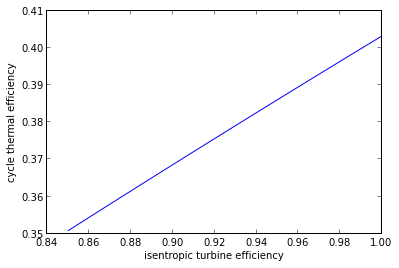

In [5]:

# Given :-
# Part (a)
etat = 0.85                                                                      # given efficiency
# From the solution to Example 8.3, the following specific enthalpy values are known, in kJ/kg
h1 = 3348.4
h2s = 2741.8
h3 = 3353.3
h4s = 2428.5
h5 = 173.88
h6 = 181.94


# Calculations
h2 = h1 - etat*(h1 - h2s)                                                 # The specific enthalpy at the exit of the first-stage turbine in kj/kg
h4 = h3 - etat*(h3-h4s)                                                   # The specific enthalpy at the exit of the second-stage turbine in kj/kg
eta = ((h1-h2)+(h3-h4)-(h6-h5))/((h1-h6)+(h3-h2)) 

# Result
print '-> The thermal efficiency is:  ',eta

# Part (b)
from numpy import linspace
from pylab import *

h2 = []
h4 = []
y  = []
x = linspace(0.85,1,50)
for i in range(0,50):
    h2.append(i)
    h4.append(i)
    y.append(i)
    h2[i] = h1 - x[i]*(h1 - h2s)                                      # The specific enthalpy at the exit of the first-stage turbine in kj/kg
    h4[i] = h3 - x[i]*(h3-h4s)                                        # The specific enthalpy at the exit of the second-stage turbine in kj/kg
    y[i]  = ((h1-h2[i])+(h3-h4[i])-(h6-h5))/((h1-h6)+(h3-h2[i])) 

plot(x,y)
xlabel('isentropic turbine efficiency')
ylabel('cycle thermal efficiency')
show()

##<heading2> Example 8.5 Page no-348

In [6]:

# Given:-
T1 = 480.0                                                                        # temperature of steam entering the turbine in degree celcius
p1 = 8.0                                                                          # pressure of steam entering the turbine in MPa
Pcond = 0.008                                                                     # condenser pressure in MPa
etat = 0.85                                                                       # turbine efficiency
Wcycledot = 100.0                                                                 # net power output of the cycle


# Analysis
# With the help of steam tables
h1 = 3348.4                                                                       # in kj/kg
h2 = 2832.8                                                                       # in kj/kg
s2 = 6.8606                                                                       # in kj/kg.k
h4 = 173.88                                                                       # in kj/kg
# With s3s = s2, the quality at state 3s is x3s=  0.8208; using this, we get
h3s = 2146.3                                                                      # in kj/kg

# Calculations
# The specific enthalpy at state 3 can be determined using the efficiency of the second-stage turbine
h3 = h2 - etat*(h2-h3s)

# State 6 is saturated liquid at 0.7 MPa. Thus,
h6 = 697.22                                                                        # in kj/kg
# For determining specific enthalpies at states 5 and 7 ,we have
p5 = 0.7                                                                           # in MPa
p4 = 0.008                                                                         # in MPa
p7 = 8.0                                                                           # in MPa
p6 = 0.7                                                                           # in MPa
v4 = 1.0084e-3                                                                     # units in m^3/kg,obtained from steam tables
v6 = 1.1080e-3                                                                     # units in m^3/kg,obtained from steam tables

# Calculations
h5 = h4 + v4*(p5-p4)*10**6*10**-3                                                  # in kj/kg
h7 = h6 + v6*(p7-p6)*10**3                                                         # in kj/kg

# Applying mass and energy rate balances to a control volume enclosing the open heater, we find the fraction y of the flow extracted at state 2 from
y = (h6-h5)/(h2-h5)

# Part(a)
wtdot = (h1-h2) + (1-y)*(h2-h3)                                                     # the total turbine work output, units in KJ/Kg
wpdot = (h7-h6) + (1-y)*(h5-h4)                                                     # The total pump work per unit of mass passing through the first-stage turbine,in KJ/kg
qindot = h1 - h7                                                                    # in kj/kg
eta = (wtdot-wpdot)/qindot

# Results
print '-> The thermal efficiency is:',round(eta,2)

# Part(b)
m1dot = (Wcycledot*3600*10**3)/(wtdot-wpdot)

# Results
print '-> The mass flow rate of steam entering the first turbine stage, is:',round(m1dot,2),'kg/h.'

-> The thermal efficiency is: 0.37
-> The mass flow rate of steam entering the first turbine stage, is: 368948.05 kg/h.

In [4]:
# Given:-
# Analysis
# State 1 is the same as in Example 8.3, so
h1 = 3348.4                                                                     # in kj/kg
s1 = 6.6586                                                                     # in kj/kg.k
# State 2 is fixed by p2  2.0 MPa and the specific entropy s2, which is the same as that of state 1. Interpolating in Table A-4, we get
h2 = 2963.5                                                                     # in kj/kg
# The state at the exit of the first turbine is the same as at the exit of the first turbine of Example 8.3, so
h3 = 2741.8                                                                     # in kj/kg
# State 4 is superheated vapor at 0.7 MPa, 440C. From Table A-4,
h4 = 3353.3                                                                     # in kj/kg
s4 = 7.7571                                                                     # in kj/kg.k
# Interpolating in table A-4 at p5 = .3MPa and s5 = s4, the enthalpy at state 5 is
h5 = 3101.5                                                                     # in kj/kg
# Using s6 = s4, the quality at state 6 is found to be
x6 = 0.9382
# Using steam tables, for state 6
hf = 173.88                                                                     # in kj/kg
hfg = 2403.1                                                                    # in kj/kg

h6 = hf + x6*hfg

# At the condenser exit, we have 
h7 = 173.88                                                                     # in kj/kg
v7 = 1.0084e-3                                                                  # in m^3/kg
p8 = 0.3                                                                        # in MPa
p7 = 0.008                                                                      # in MPa

h8 = h7 + v7*(p8-p7)*10**6*10**-3                                               # The specific enthalpy at the exit of the first pump in kj/kg
# The liquid leaving the open feedwater heater at state 9 is saturated liquid at 0.3 MPa. The specific enthalpy is
h9 = 561.47                                                                     # in kj/kg

# For the exit of the second pump,
v9 = 1.0732e-3                                                                  # in m^3/kg
p10 = 8.0                                                                       # in MPa
p9 = 0.3                                                                        # in MPa
h10 = h9 + v9*(p10-p9)*10**6*10**-3                                             # The specific enthalpy at the exit of the second pump in kj/kg
# The condensate leaving the closed heater is saturated at 2 MPa. From Table A-3,
h12 = 908.79                                                                    # in kj/kg
h13 = h12                                                                       # since The fluid passing through the trap undergoes a throttling process
# For the feedwater exiting the closed heater
hf = 875.1                                                                      # in kj/kg
vf = 1.1646e-3                                                                  # in m^3/kg
p11 = 8.0                                                                       # in MPa
psat = 1.73                                                                     # in MPa
h11 = hf + vf*(p11-psat)*10**6*10**-3                                           # in kj/kg

ydash = (h11-h10)/(h2-h12)                                                      # the fraction of the total flow diverted to the closed heater
ydashdash = ((1-ydash)*h8+ydash*h13-h9)/(h8-h5)                                 # the fraction of the total flow diverted to the open heater

# Part(a)
wt1dot = (h1-h2) + (1-ydash)*(h2-h3)                                            # The work developed by the first turbine per unit of mass entering in kj/kg
wt2dot = (1-ydash)*(h4-h5) + (1-ydash-ydashdash)*(h5-h6)                        # The work developed by the second turbine per unit of mass in kj/kg
wp1dot = (1-ydash-ydashdash)*(h8-h7)                                            # The work for the first pump per unit of mass in kj/kg
wp2dot = h10-h9                                                                 # The work for the second pump per unit of mass in kj/kg
qindot = (h1-h11) + (1-ydash)*(h4-h3)                                           # The total heat added expressed on the basis of a unit of mass entering the first
                                                                                # turbine
eta = (wt1dot+wt2dot-wp1dot-wp2dot)/qindot                                      # thermal efficiency

# Result
print('The thermal efficiency is:  ',round(eta,3))

# Part(b)
Wcycledot = 100.0                                                               # the net power output of the cycle in MW
m1dot = (Wcycledot*3600*10**3)/(wt1dot+wt2dot-wp1dot-wp2dot)

# Result
print('The mass flow rate of the steam entering the first turbine, in kg/h is:  ',round(m1dot,3))

The thermal efficiency is:   0.431
The mass flow rate of the steam entering the first turbine, in kg/h is:   280126.533


##<heading2>  Example 8.7 Page no-360

In [8]:

# Given:-
# Analysis
# The solution to Example 8.2 gives
h1 = 2758                                                                   # in kj/kg
h4 = 183.36                                                                 # in kj/kg
# From table A-22
hi = 1491.44                                                                # in kj/kg
he = 843.98                                                                 # in kj/kg
# Using the conservation of mass principle and energy rate balance, the ratio of mass flow rates of air and water is
madotbymdot = (h1-h4)/(hi-he)
# From example 8.2
mdot = 4.449e5                                                              # in kg/h
madot =  madotbymdot*mdot                                                   # in kg/h

# Part(a)
T0 = 295                                                                    # in kelvin
# From table A-22
si = 3.34474                                                                # in kj/kg.k
se = 2.74504                                                                # in MW
# Calculation
Rin = madot*(hi-he-T0*(si-se))/(3600*10**3)                                 # The net rate at which exergy is carried into the heat exchanger 
                                                                            # unit by the gaseous stream 
# Result
print '-> The net rate at which exergy is carried into the heat exchanger unit by the gas stream, is:',round(Rin,2),'MW '

# Part(b)
# From table A-3
s1 = 5.7432                                                                 # in kj/kg.k
# From interpolation in table A-5 gives
s4 = 0.5957                                                                 # in kj/kg.k
# Calculation
Rout = mdot*(h1-h4-T0*(s1-s4))/(3600*10**3)                                 # in MW
# Result
print '-> The net rate at which exergy is carried from the heat exchanger by the water stream, is:',round(Rout,2),'MW .'

# Part(c)
Eddot = Rin-Rout                                                            # in MW
# Result
print '-> The rate of exergy destruction, in MW is:',round(Eddot,2)

# Part(d)
epsilon = Rout/Rin
# Result
print '-> The exergetic efficiency is: ',round(epsilon,2)

-> The net rate at which exergy is carried into the heat exchanger unit by the gas stream, is: 231.24 MW 
-> The net rate at which exergy is carried from the heat exchanger by the water stream, is: 130.52 MW .
-> The rate of exergy destruction, in MW is: 100.72
-> The exergetic efficiency is:  0.56

##<heading2>  Example 8.8 Page no-362

In [9]:

# Given:-
T0 = 295.00                                                                 # in kelvin
P0 = 1.00                                                                   # in atm

# Analysis
# From table A-3
s1 = 5.7432                                                                 # in kj/kg.k
s3 =0.5926                                                                  # in kj/kg.k

# Using h2 = 1939.3 kJ/kg from the solution to Example 8.2, the value of s2 can be determined from Table A-3 as
s2 = 6.2021                                                                 # in kj/kg.k
s4 = 0.5957                                                                 # in kj/kg.k
mdot = 4.449e5                                                              # in kg/h

# Calculations
Eddot = mdot*T0*(s2-s1)/(3600*10**3)                                         # the rate of exergy destruction for the turbine in MW
EddotP = mdot*T0*(s4-s3)/(3600*10**3)                                        # the exergy destruction rate for the pump

# Results
print '-> The rate of exergy destruction for the turbine is: ',round(Eddot,2),'MW.'
# From the solution to Example 8.7, the net rate at which exergy is supplied by the cooling combustion gases is 231.28 MW
print '-> The turbine rate of exergy destruction expressed as a percentage is:  ',round((Eddot/231.28)*100)
# However, since only 69% of the entering fuel exergy remains after the stack loss and combustion exergy destruction are accounted for, 
# it can be concluded that
print '-> Percentage of the exergy entering the plant with the fuel destroyed within the turbine is:',round(0.69*(Eddot/231.28)*100,2)
print '-> The exergy destruction rate for the pump in MW is:',round(EddotP,2)
print 'and expressing this as a percentage of the exergy entering the plant as calculated above, we have',round((EddotP/231.28)*69,2) 
print '-> The net power output of the vapor power plant of Example 8.2 is 100 MW. Expressing this as a percentage of the rate at which exergy is '
print 'carried into the plant with the fuel, ',round((100/231.28)*69,2)

-> The rate of exergy destruction for the turbine is:  16.73 MW.
-> The turbine rate of exergy destruction expressed as a percentage is:   7.0
-> Percentage of the exergy entering the plant with the fuel destroyed within the turbine is: 4.99
-> The exergy destruction rate for the pump in MW is: 0.11
and expressing this as a percentage of the exergy entering the plant as calculated above, we have 0.03
-> The net power output of the vapor power plant of Example 8.2 is 100 MW. Expressing this as a percentage of the rate at which exergy is 
carried into the plant with the fuel,  29.83

##<heading2> Example 8.9 Page no-364

In [10]:

# Given:-
T0 = 295                                                                # in kelvin
# Analysis
# From solution to Example 8.2.
mcwdot = 9.39e6                                                         # mass flow rate of the cooling water in kg/h

# Part(a)
# With saturated liquid values for specific enthalpy and entropy from Table A-2
he = 146.68                                                             # in kj/kg
hi = 62.99                                                              # in kj/kg
se = 0.5053                                                             # in kj/kg.k
si = 0.2245                                                             # in kj/kg.k
# Calculations
Rout = mcwdot*(he-hi-T0*(se-si))/(3600*10**3)                           # The net rate at which exergy is carried out of the condenser in MW
# Results
print '-> The net rate at which exergy is carried from the condenser by the cooling water, is:',round(Rout,2),'MW.'
print '-> Expressing this as a percentage of the exergy entering the plant with the fuel, we get ',round((Rout/231.28)*69,2),'percent'

# Part(b)
# From table 
s3 = 0.5926                                                              # in kj/kg.k
s2 = 6.2021                                                              # in kg/kg.k
mdot = 4.449e5                                                           # in kg/h
# Calculations
Eddot = T0*(mdot*(s3-s2)+mcwdot*(se-si))/(3600*10**3)                    # the rate of exergy destruction for the condenser in MW
# Results
print '-> The rate of exergy destruction for the condenser is:  ',round(Eddot,2),'MW.'
print '-> Expressing this as a percentage of the exergy entering the plant with the fuel, we get,',round((Eddot/231.28)*69,2),'percent'

-> The net rate at which exergy is carried from the condenser by the cooling water, is: 2.23 MW.
-> Expressing this as a percentage of the exergy entering the plant with the fuel, we get  0.66 percent
-> The rate of exergy destruction for the condenser is:   11.56 MW.
-> Expressing this as a percentage of the exergy entering the plant with the fuel, we get, 3.45 percent